In [14]:
pip install plotly pandas

Note: you may need to restart the kernel to use updated packages.


In [16]:
import plotly.express as px
import pandas as pd
import seaborn as sns

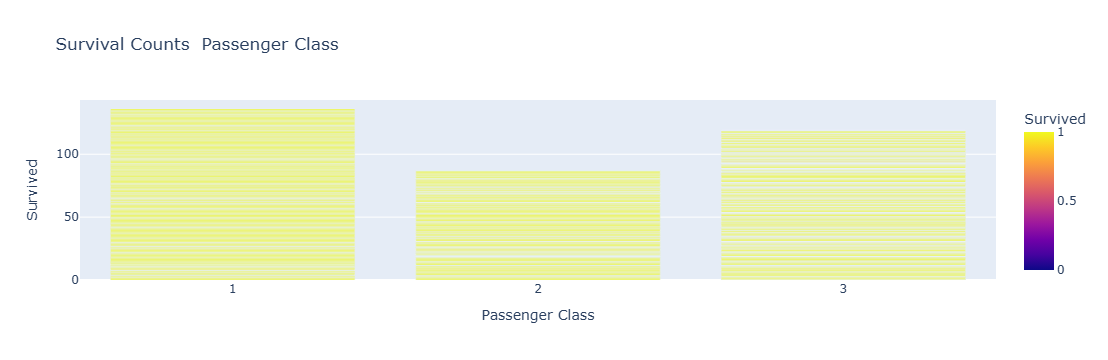

In [28]:
# Task 1(a)
df_titanic = sns.load_dataset('titanic')
fig = px.bar(
    df_titanic,
    x='pclass',
    y ='survived',
    color='survived',
    barmode='group',
    title='Survival Counts  Passenger Class',
    labels={'pclass': 'Passenger Class', 'survived': 'Survived'}
)
fig.show()

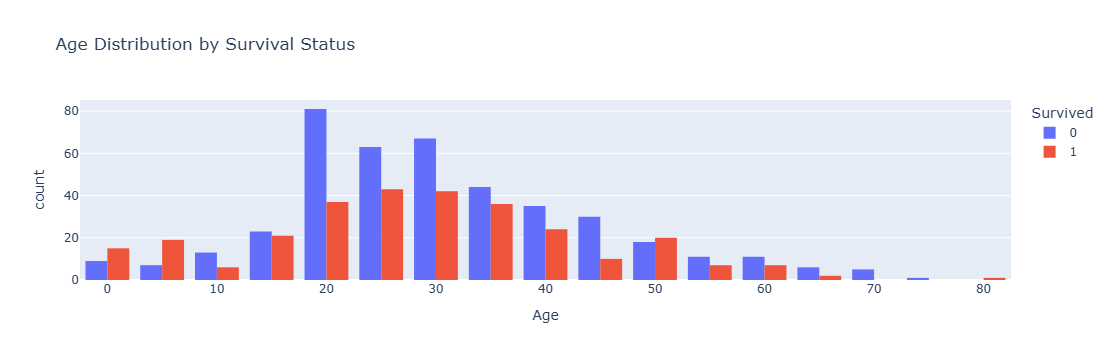

In [60]:
# (b)
fig = px.histogram(
    df_titanic,
    x='age',
    #y= 'count',
    color='survived',
    #nbins= 30,
    barmode = 'group',
    title='Age Distribution by Survival Status',
    labels={'age': 'Age', 'survived': 'Survived'},
    hover_data=['age', 'survived']
)
fig.show()

In [48]:
pip install dash pandas plotly

Note: you may need to restart the kernel to use updated packages.


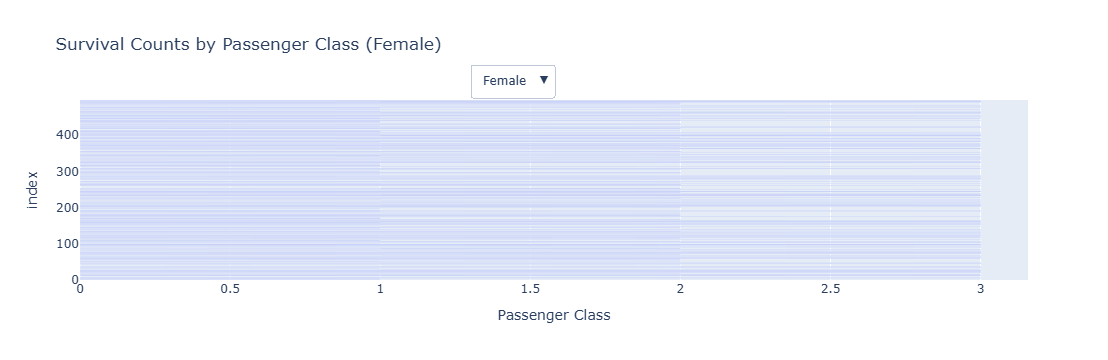

In [50]:
# Task 2
import plotly.express as px
import seaborn as sns

df_titanic = sns.load_dataset('titanic')

fig = px.bar(
    df_titanic[df_titanic['sex'] == 'male'],
    x='pclass',
    color='survived',
    barmode='group',
    title='Survival Counts by Passenger Class (Filtered by Gender)',
    labels={'pclass': 'Passenger Class', 'survived': 'Survived'}
)

fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'method': 'update',
                    'label': 'Male',
                    'args': [
                        {'x': [df_titanic[df_titanic['sex'] == 'male']['pclass']],
                         'marker.color': df_titanic[df_titanic['sex'] == 'male']['survived']},
                        {'title': 'Survival Counts by Passenger Class (Male)'}
                    ]
                },
                {
                    'method': 'update',
                    'label': 'Female',
                    'args': [
                        {'x': [df_titanic[df_titanic['sex'] == 'female']['pclass']],
                         'marker.color': df_titanic[df_titanic['sex'] == 'female']['survived']},
                        {'title': 'Survival Counts by Passenger Class (Female)'}
                    ]
                }
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.5,
            'y': 1.2
        }
    ]
)
fig.show()


In [23]:
# Task 3
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic') 
titanic = titanic.dropna(subset=['age', 'fare', 'survived', 'pclass'])
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Titanic Interactive Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        html.Label("Select Passenger Class:"),
        dcc.Dropdown(
            id='class-dropdown',
            options=[{'label': f"Class {cls}", 'value': cls} for cls in sorted(titanic['pclass'].unique())],
            value=1,
            clearable=False
        ),
    ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

    dcc.Graph(id='scatter-plot'),
    
    html.Div([
        dcc.Graph(id='survival-pie'),
        dcc.Graph(id='age-histogram')
    ], style={'display': 'flex'}),
])
@app.callback(
    Output('scatter-plot', 'figure'),
    Output('survival-pie', 'figure'),
    Output('age-histogram', 'figure'),
    Input('class-dropdown', 'value'),
    Input('scatter-plot', 'clickData')
)
def update_graphs(selected_class, clickData):
    filtered = titanic[titanic['pclass'] == selected_class]
    
    scatter_fig = px.scatter(
        filtered,
        x='age',
        y='fare',
        color='survived',
        title=f"Age vs Fare (Class {selected_class})",
        labels={'survived': 'Survived'},
        color_continuous_scale=['red', 'green']
    
    if clickData:
        selected_points = [point['pointIndex'] for point in clickData['points']]
        scatter_fig.update_traces(
            selectedpoints=selected_points,
            marker=dict(size=10, line=dict(width=2, color='black')),
            unselected_marker=dict(opacity=0.3)
        )

    scatter_fig.update_layout(dragmode='select')

    pie_fig = px.pie(
        filtered,
        names='survived',
        title=f"Survival Ratio (Class {selected_class})",
        color='survived',
        color_discrete_map={0: 'red', 1: 'green'},
        hole=0.4
    )

    hist_fig = px.histogram(
        filtered,
        x='age',
        color='survived',
        barmode='overlay',
        title=f"Age Distribution (Class {selected_class})",
        color_discrete_map={0: 'red', 1: 'green'},
        opacity=0.7
    )

    return scatter_fig, pie_fig, hist_fig
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
# Task 4
import seaborn as sns
import plotly.express as px

df = sns.load_dataset('titanic')

df = df.dropna(subset=['Age', 'Fare'])

fig = px.scatter(df, x='Age', y='Fare', hover_data={
    'name': True,      
    'cabin': True,      
    'embarked': True    
})

fig.show()
